In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.sparse.linalg import eigs



In [21]:

# Load the bipartite crime network
network_data_path = r"C:\Users\Sukirtha\Downloads\download.tsv.moreno_crime\moreno_crime\out.moreno_crime_crime"

# Read the network file
edges = []
with open(network_data_path, "r", encoding="utf-8", errors='replace') as f:
    for line in f:
        if line.startswith("%"):  # Ignore metadata lines
            continue
        parts = line.strip().split()
        if len(parts) >= 2:  # Ensure there are at least two nodes in the line
            node1, node2 = map(int, parts[:2])  # Use only the first two columns
            edges.append((node1, node2))

# Create a bipartite graph
B = nx.Graph()
B.add_edges_from(edges)

# Identify connected components
components = list(nx.connected_components(B))

# Basic network statistics
num_nodes = B.number_of_nodes()
num_edges = B.number_of_edges()
print(f"Network Statistics:\nNodes: {num_nodes}\nEdges: {num_edges}\n")



Network Statistics:
Nodes: 829
Edges: 1475



Network Statistics:
Max Degree: 25
Min Degree: 1
Average Degree: 3.56
Std Dev of Degree Distribution: 3.02


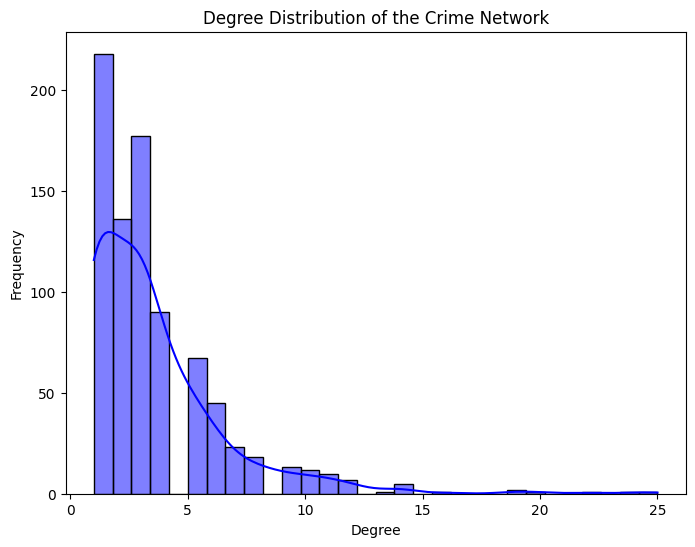

In [22]:
# Summarize Network Statistics
degree_sequence = [deg for _, deg in B.degree()]
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)
avg_degree = np.mean(degree_sequence)
std_dev_degree = np.std(degree_sequence)

print("Network Statistics:")
print(f"Max Degree: {max_degree}")
print(f"Min Degree: {min_degree}")
print(f"Average Degree: {avg_degree:.2f}")
print(f"Std Dev of Degree Distribution: {std_dev_degree:.2f}")

# Plot Degree Distribution
plt.figure(figsize=(8, 6))
sns.histplot(degree_sequence, bins=30, kde=True, color='blue')
plt.title("Degree Distribution of the Crime Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()



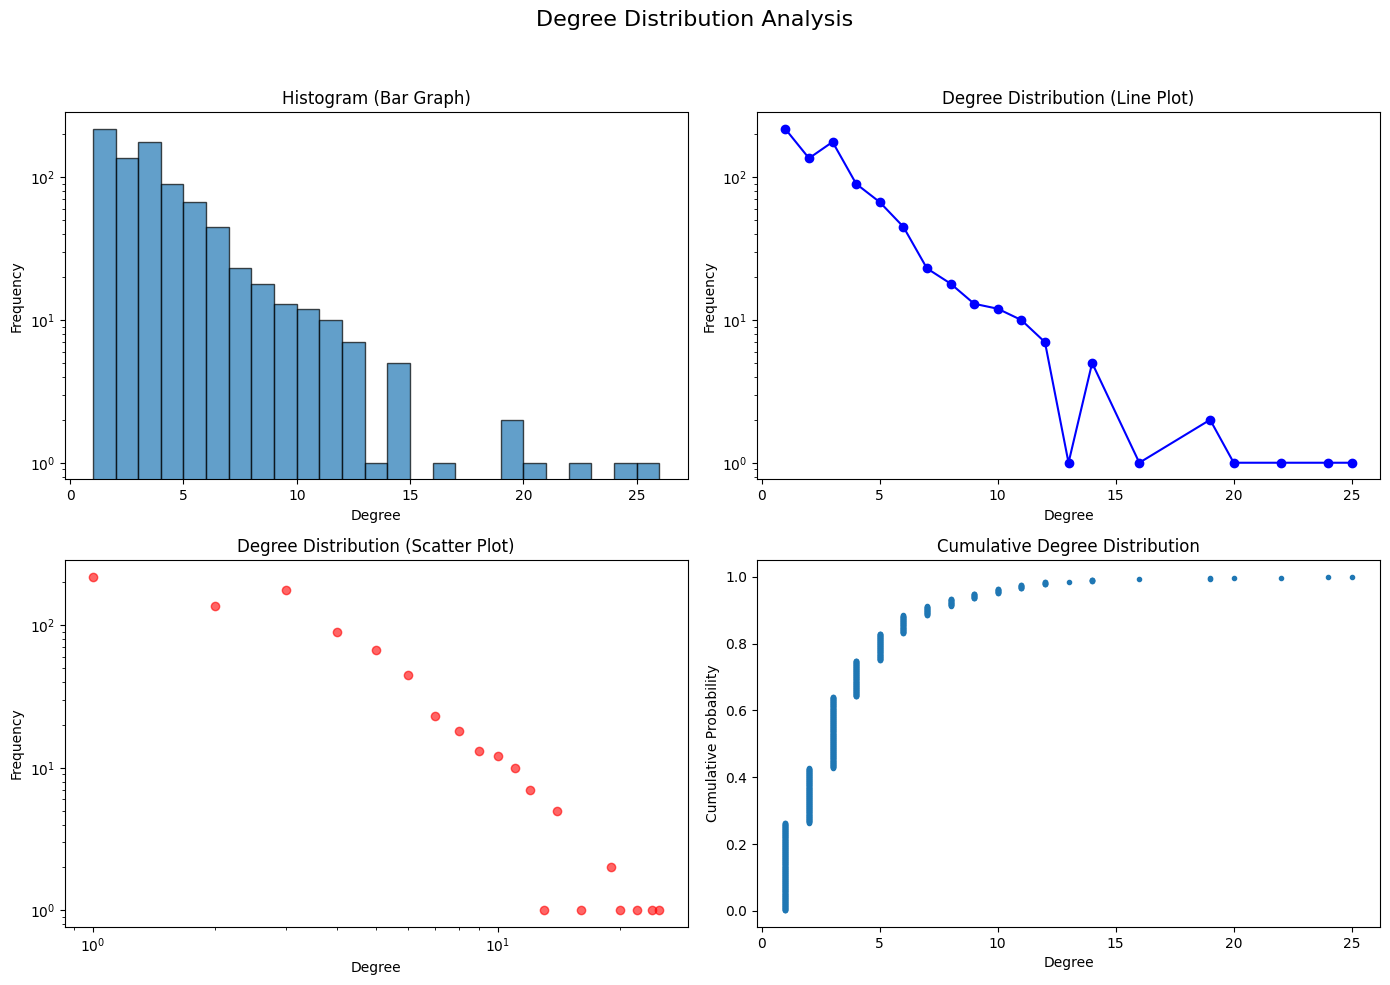

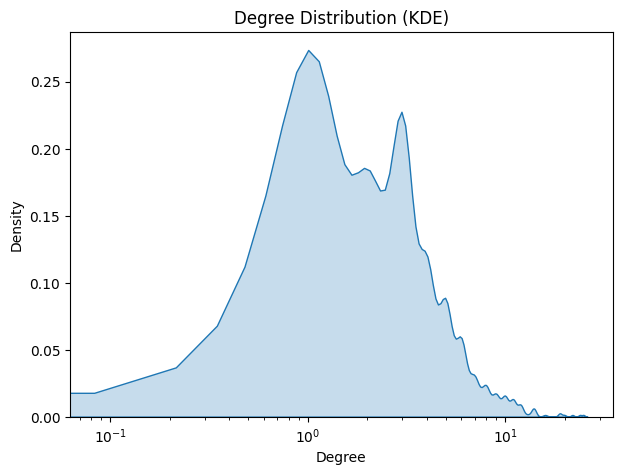

In [24]:
import seaborn as sns

# Extract degree values
degree_values = [d for n, d in B.degree()]
unique_degrees, counts = np.unique(degree_values, return_counts=True)

# Create Subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Degree Distribution Analysis", fontsize=16)

# 1 Histogram (Bar Graph)
axes[0, 0].hist(degree_values, bins=range(1, max(degree_values) + 2), edgecolor="black", alpha=0.7)
axes[0, 0].set_xlabel("Degree")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Histogram (Bar Graph)")
axes[0, 0].set_yscale("log")

# 2 Line Plot
axes[0, 1].plot(unique_degrees, counts, marker="o", linestyle="-", color="b")
axes[0, 1].set_xlabel("Degree")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Degree Distribution (Line Plot)")
axes[0, 1].set_yscale("log")

# 3️ Scatter Plot
axes[1, 0].scatter(unique_degrees, counts, color="red", alpha=0.6)
axes[1, 0].set_xlabel("Degree")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Degree Distribution (Scatter Plot)")
axes[1, 0].set_xscale("log")
axes[1, 0].set_yscale("log")

# 4️ CDF Plot
sorted_degrees = np.sort(degree_values)
cdf = np.arange(1, len(sorted_degrees) + 1) / len(sorted_degrees)
axes[1, 1].plot(sorted_degrees, cdf, marker=".", linestyle="none")
axes[1, 1].set_xlabel("Degree")
axes[1, 1].set_ylabel("Cumulative Probability")
axes[1, 1].set_title("Cumulative Degree Distribution")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 5️ KDE Plot (Separate Figure)
plt.figure(figsize=(7, 5))
sns.kdeplot(degree_values, bw_adjust=0.5, fill=True)
plt.xlabel("Degree")
plt.ylabel("Density")
plt.title("Degree Distribution (KDE)")
plt.xscale("log")
plt.show()

In [19]:
# Compute Centrality Measures
degree_centrality = nx.degree_centrality(B)
eigenvector_centrality = nx.eigenvector_centrality(B, max_iter=1000)

# Handling Katz Centrality with dynamic α selection
try:
    largest_eigenvalue = max(abs(nx.adjacency_spectrum(B)))  # Largest eigenvalue
    alpha = 0.85 / largest_eigenvalue  # Alpha should be smaller than 1 / λ_max
    katz_centrality = nx.katz_centrality(G, alpha=alpha, beta=1.0, max_iter=1000)
except nx.PowerIterationFailedConvergence:
    print(" Katz centrality failed to converge with initial alpha. Retrying with a smaller alpha...")
    alpha = 0.5 * alpha  # Reduce α and retry
    katz_centrality = nx.katz_centrality(B, alpha=alpha, beta=1.0, max_iter=1000)

pagerank = nx.pagerank(B)
closeness_centrality = nx.closeness_centrality(B)
betweenness_centrality = nx.betweenness_centrality(B)
local_clustering = nx.clustering(B)
global_clustering = nx.transitivity(G)

# Average Local Clustering Coefficient
avg_local_clustering = np.mean(list(local_clustering.values()))

# Print Clustering Coefficients
print(f" Global Clustering Coefficient: {global_clustering:.4f}")
print(f" Average Local Clustering Coefficient: {avg_local_clustering:.4f}")

NameError: name 'G' is not defined

In [11]:
# Store centrality measures in DataFrame
df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Eigenvector Centrality': eigenvector_centrality,
    'Katz Centrality': katz_centrality,
    'PageRank': pagerank,
    'Closeness Centrality': closeness_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Local Clustering Coefficient': local_clustering
}).sort_index()

# Display summary statistics
print(df.describe())

       Degree Centrality  Eigenvector Centrality  Katz Centrality    PageRank  \
count         829.000000              829.000000       829.000000  829.000000   
mean            0.004298                0.020189         0.028433    0.001206   
std             0.003648                0.028278         0.019958    0.000869   
min             0.001208                0.000172         0.010021    0.000418   
25%             0.001208                0.004763         0.015808    0.000538   
50%             0.003623                0.011506         0.023081    0.000986   
75%             0.006039                0.025881         0.035049    0.001492   
max             0.030193                0.316177         0.192249    0.007138   

       Closeness Centrality  Betweenness Centrality  \
count            829.000000              829.000000   
mean               0.200926                0.004885   
std                0.022253                0.008359   
min                0.143055                0.00000

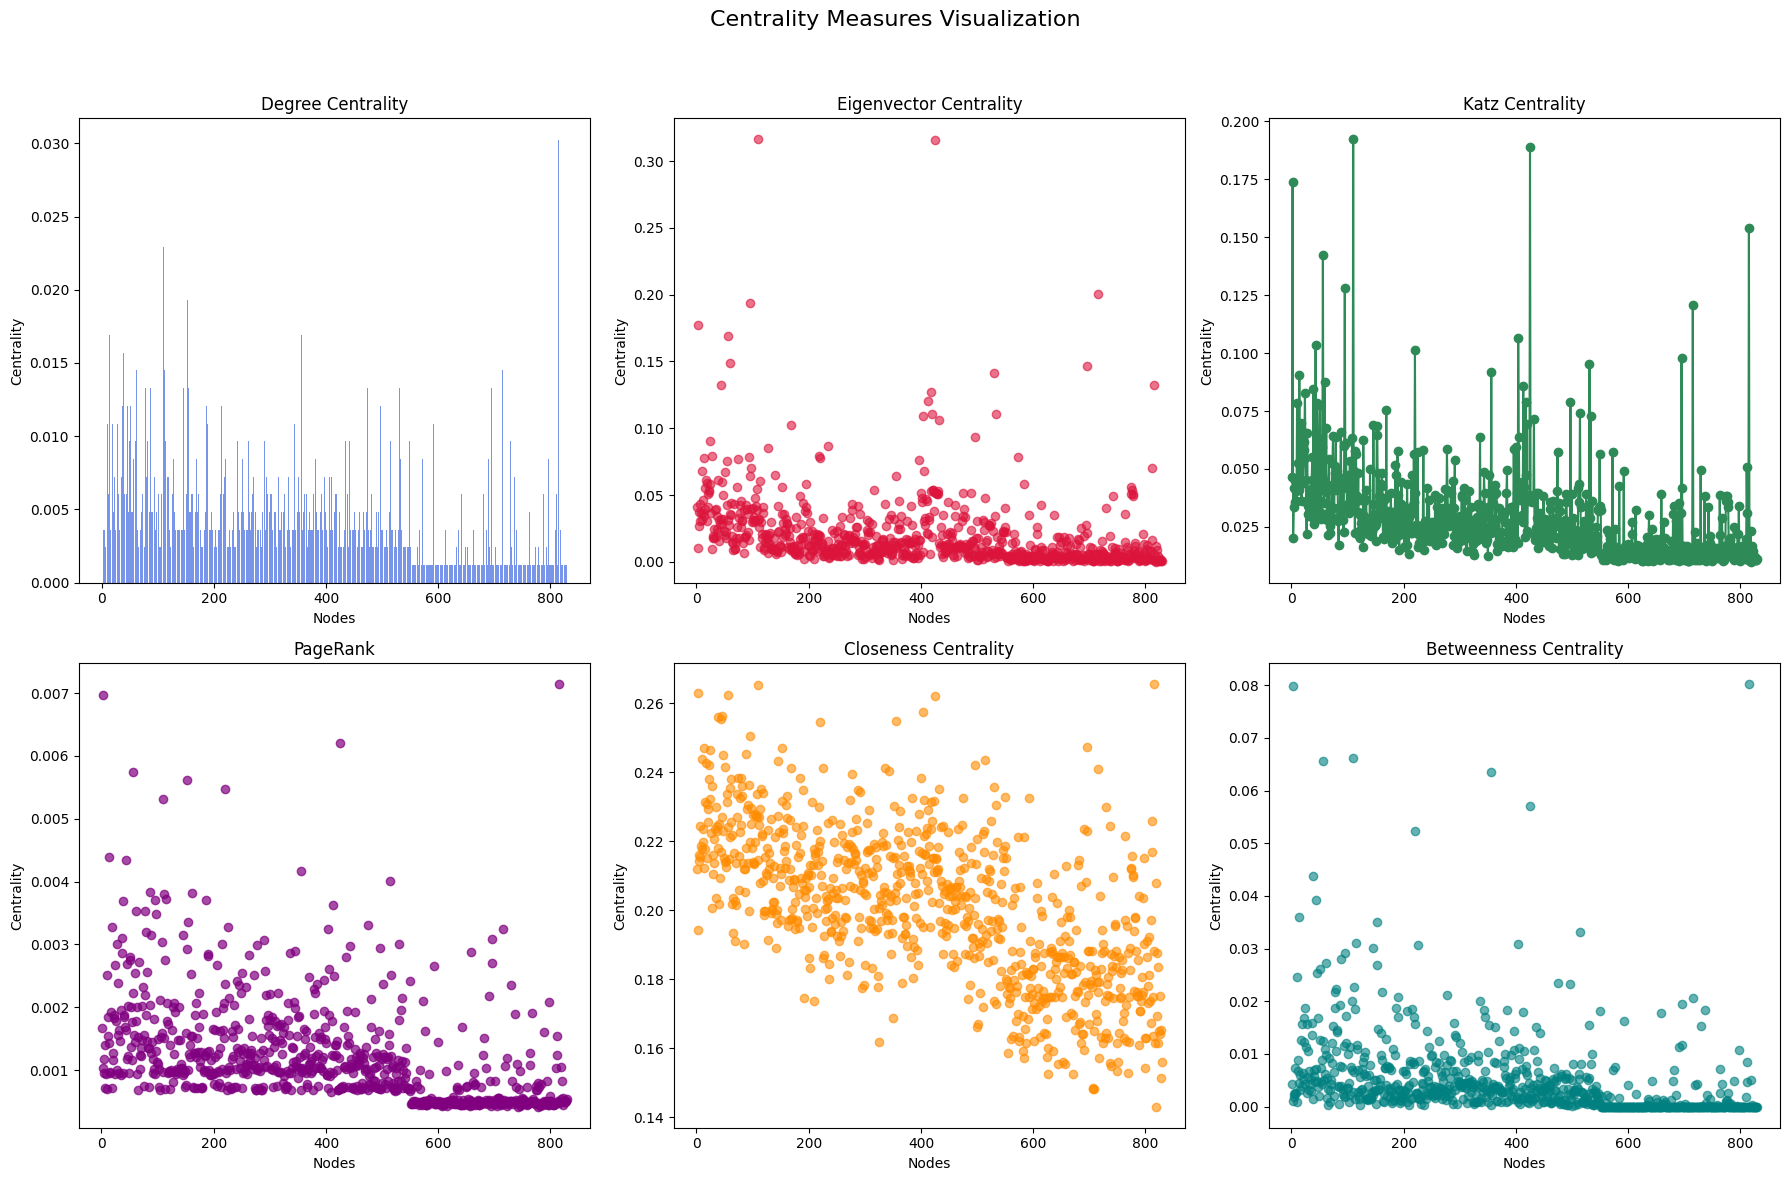

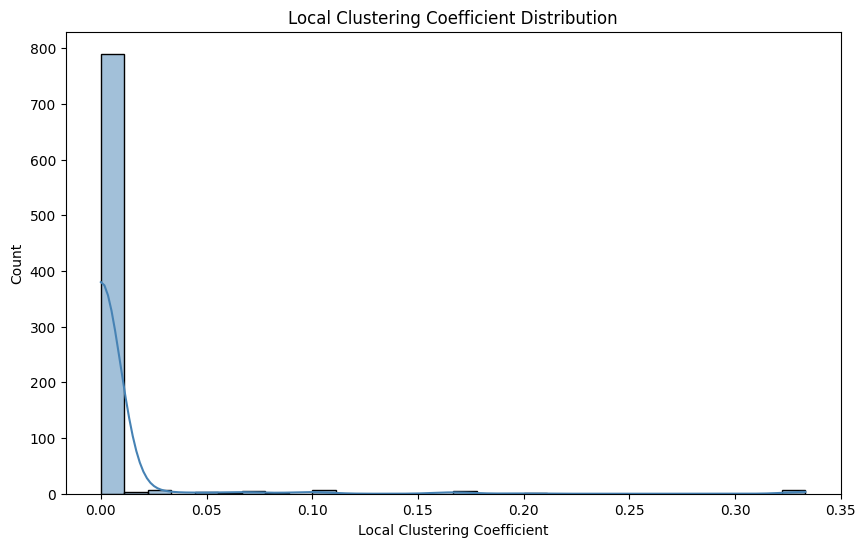

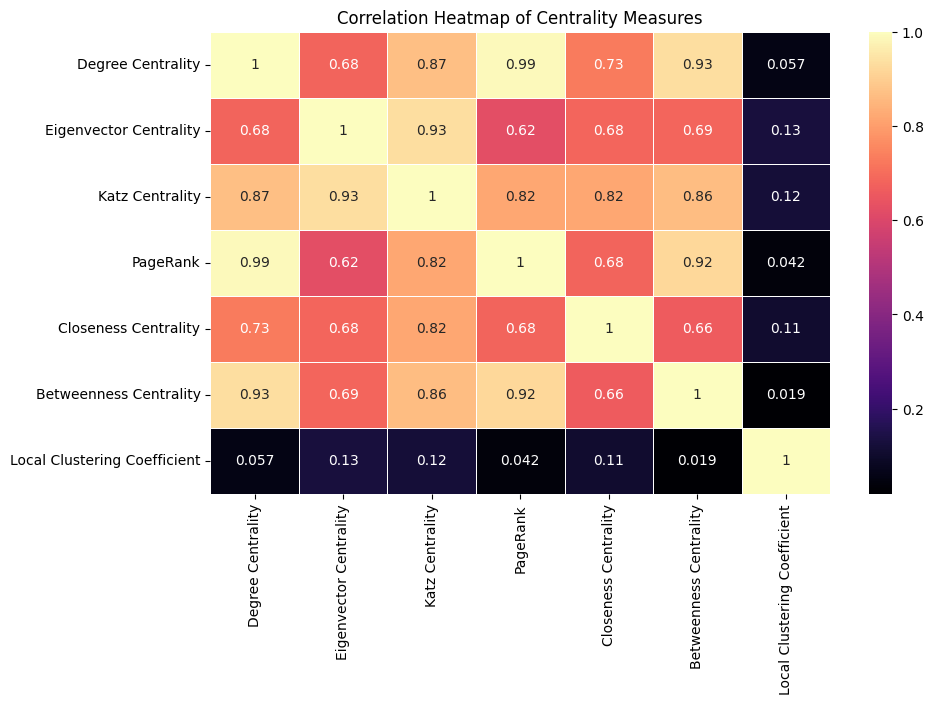

In [14]:
### 🎨 Visualization of Centrality Measures ###
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Centrality Measures Visualization", fontsize=16)

# 1️⃣ Degree Centrality - Bar Chart
axes[0, 0].bar(df.index, df["Degree Centrality"], color="royalblue", alpha=0.7)
axes[0, 0].set_title("Degree Centrality")
axes[0, 0].set_xlabel("Nodes")
axes[0, 0].set_ylabel("Centrality")

# 2️⃣ Eigenvector Centrality - Scatter Plot
axes[0, 1].scatter(df.index, df["Eigenvector Centrality"], color="crimson", alpha=0.6)
axes[0, 1].set_title("Eigenvector Centrality")
axes[0, 1].set_xlabel("Nodes")
axes[0, 1].set_ylabel("Centrality")

# 3️⃣ Katz Centrality - Line Plot
axes[0, 2].plot(df.index, df["Katz Centrality"], marker="o", linestyle="-", color="seagreen")
axes[0, 2].set_title("Katz Centrality")
axes[0, 2].set_xlabel("Nodes")
axes[0, 2].set_ylabel("Centrality")

# 4️⃣ PageRank - Scatter Plot
axes[1, 0].scatter(df.index, df["PageRank"], color="purple", alpha=0.7)
axes[1, 0].set_title("PageRank")
axes[1, 0].set_xlabel("Nodes")
axes[1, 0].set_ylabel("Centrality")

# 5️⃣ Closeness Centrality - Scatter Plot
axes[1, 1].scatter(df.index, df["Closeness Centrality"], color="darkorange", alpha=0.6)
axes[1, 1].set_title("Closeness Centrality")
axes[1, 1].set_xlabel("Nodes")
axes[1, 1].set_ylabel("Centrality")

# 6️⃣ Betweenness Centrality - Scatter Plot
axes[1, 2].scatter(df.index, df["Betweenness Centrality"], color="teal", alpha=0.6)
axes[1, 2].set_title("Betweenness Centrality")
axes[1, 2].set_xlabel("Nodes")
axes[1, 2].set_ylabel("Centrality")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Clustering Coefficient Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Local Clustering Coefficient'], bins=30, kde=True, color="steelblue")
plt.title("Local Clustering Coefficient Distribution")
plt.show()

### 🔥 Heatmap of Centrality Measures ###
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="magma", linewidths=0.5)
plt.title("Correlation Heatmap of Centrality Measures")
plt.show()




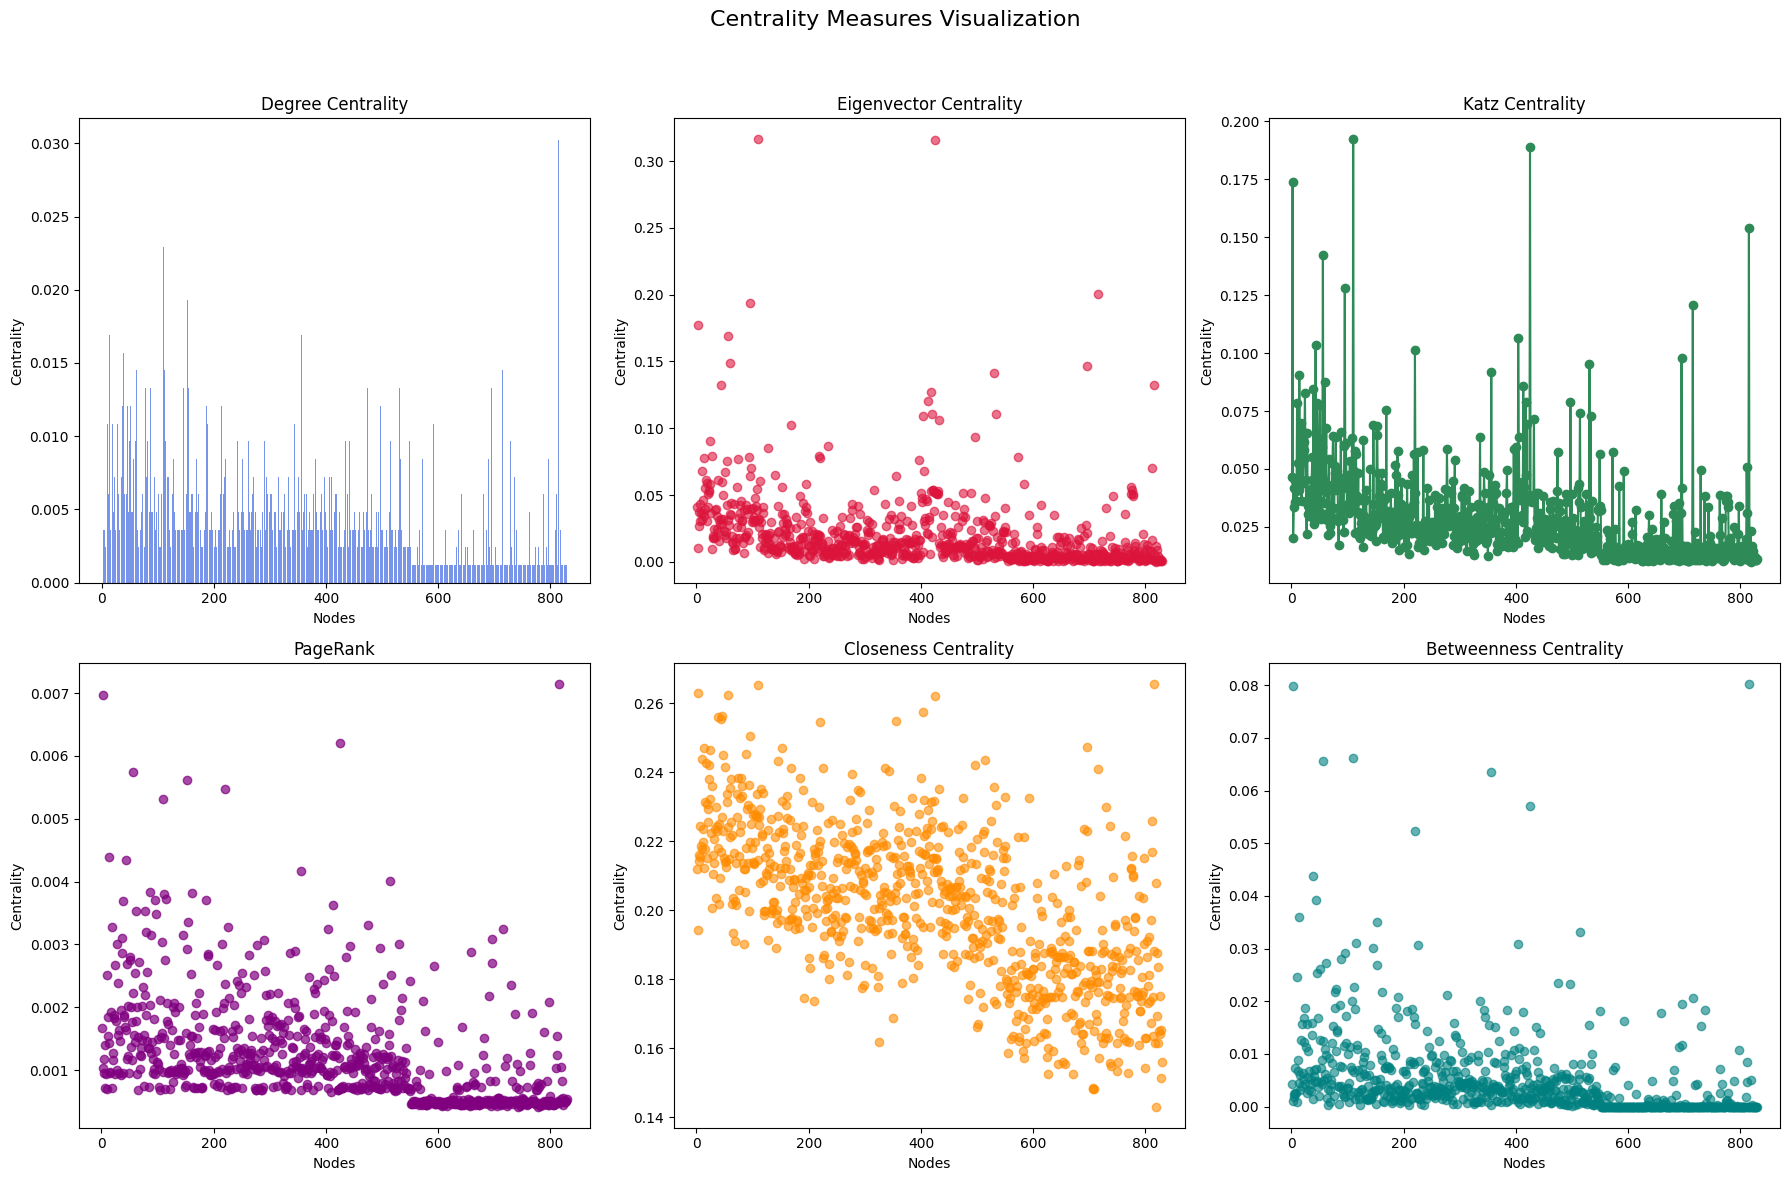

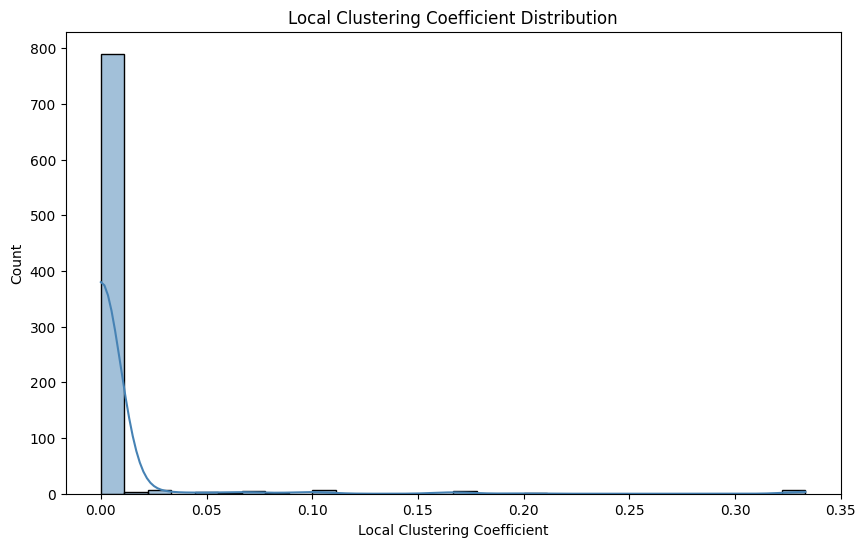

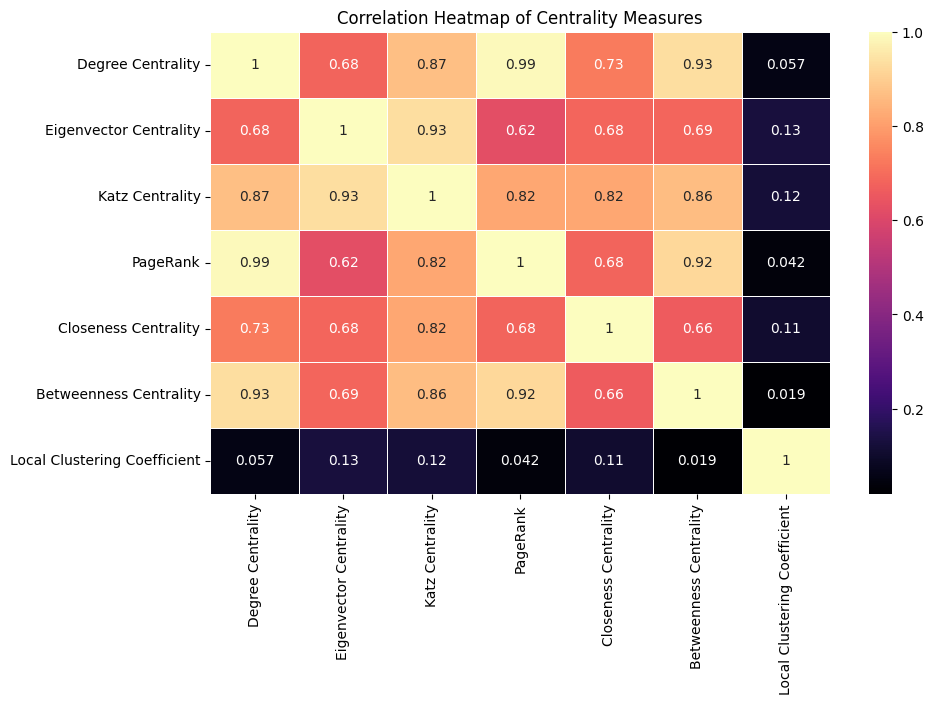

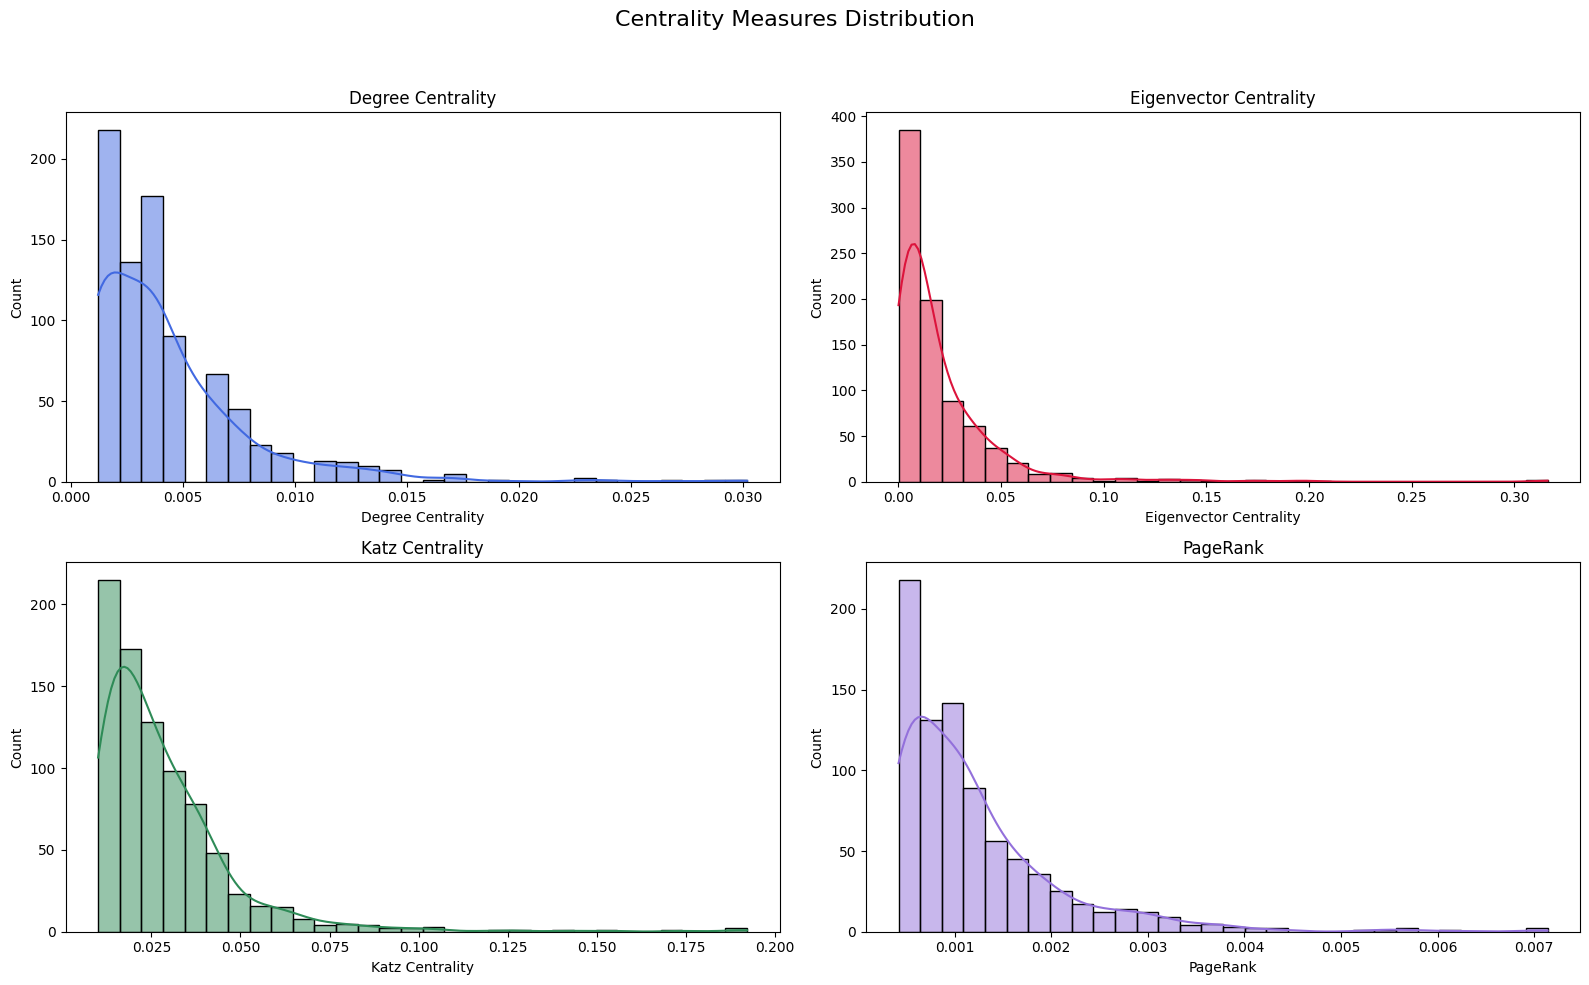

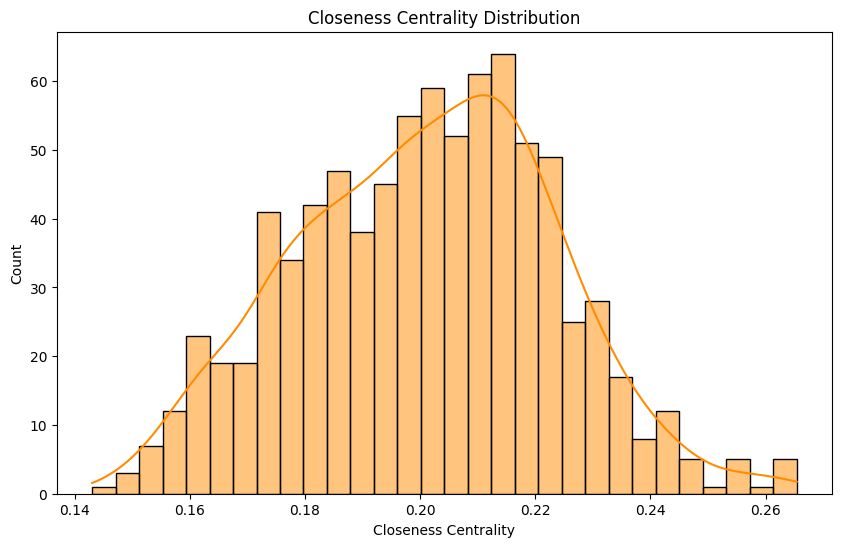

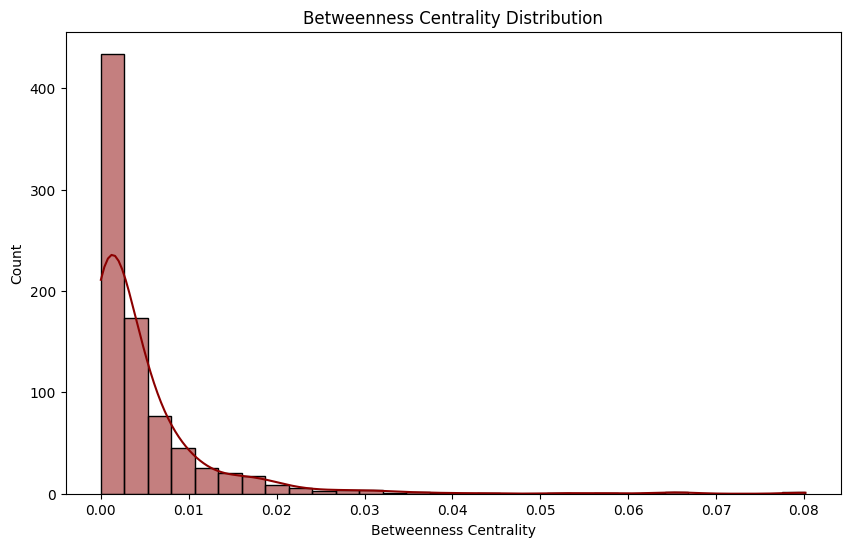

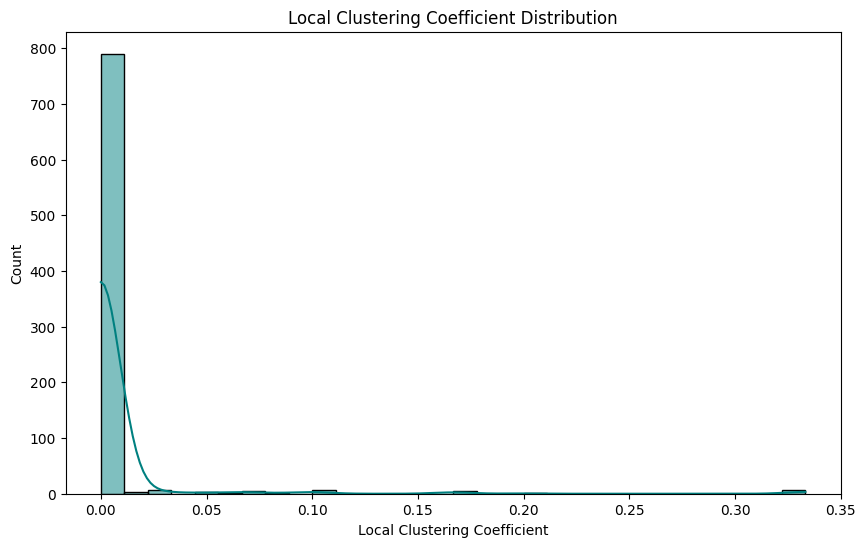

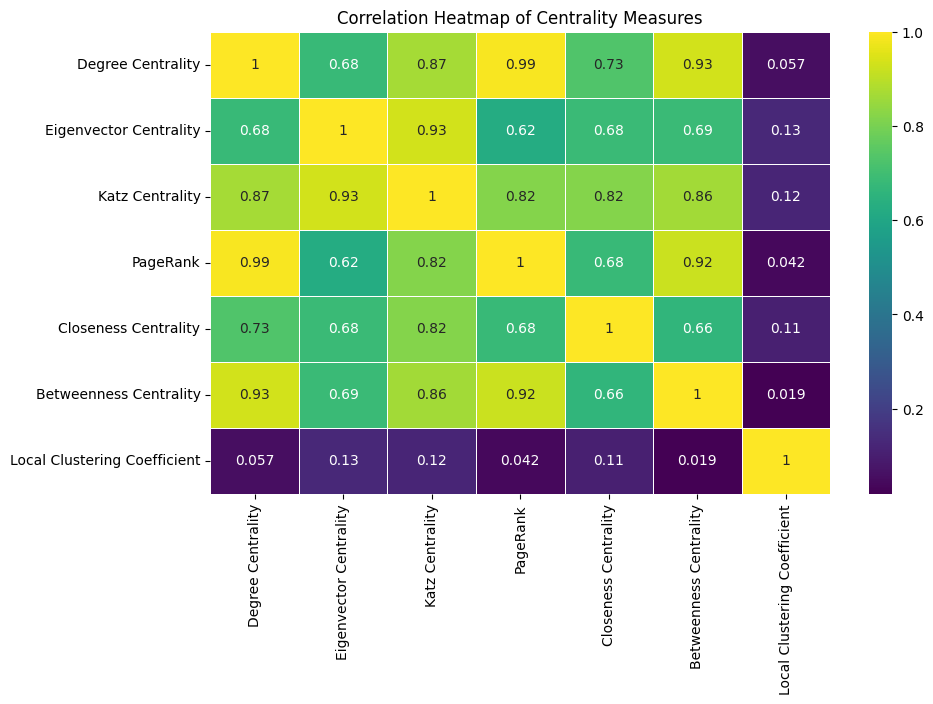

In [17]:
### 🎨 Histogram Visualization of Centrality Measures ###
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Centrality Measures Distribution", fontsize=16)

# 1️⃣ Degree Centrality - Histogram
sns.histplot(df["Degree Centrality"], bins=30, kde=True, color="royalblue", ax=axes[0, 0])
axes[0, 0].set_title("Degree Centrality")

# 2️⃣ Eigenvector Centrality - Histogram
sns.histplot(df["Eigenvector Centrality"], bins=30, kde=True, color="crimson", ax=axes[0, 1])
axes[0, 1].set_title("Eigenvector Centrality")

# 3️⃣ Katz Centrality - Histogram
sns.histplot(df["Katz Centrality"], bins=30, kde=True, color="seagreen", ax=axes[1, 0])
axes[1, 0].set_title("Katz Centrality")

# 4️⃣ PageRank - Histogram
sns.histplot(df["PageRank"], bins=30, kde=True, color="mediumpurple", ax=axes[1, 1])
axes[1, 1].set_title("PageRank")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 🔥 Closeness Centrality - Separate Histogram ###
plt.figure(figsize=(10, 6))
sns.histplot(df['Closeness Centrality'], bins=30, kde=True, color="darkorange")
plt.title("Closeness Centrality Distribution")
plt.show()

### 🔥 Betweenness Centrality - Separate Histogram ###
plt.figure(figsize=(10, 6))
sns.histplot(df['Betweenness Centrality'], bins=30, kde=True, color="darkred")
plt.title("Betweenness Centrality Distribution")
plt.show()

### 🔥 Histogram of Local Clustering Coefficient ###
plt.figure(figsize=(10, 6))
sns.histplot(df['Local Clustering Coefficient'], bins=30, kde=True, color="teal")
plt.title("Local Clustering Coefficient Distribution")
plt.show()

### 🔥 Heatmap of Centrality Measures ###
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="viridis", linewidths=0.5)
plt.title("Correlation Heatmap of Centrality Measures")
plt.show()

# Let me know if you want more tweaks or visual enhancements! 🚀


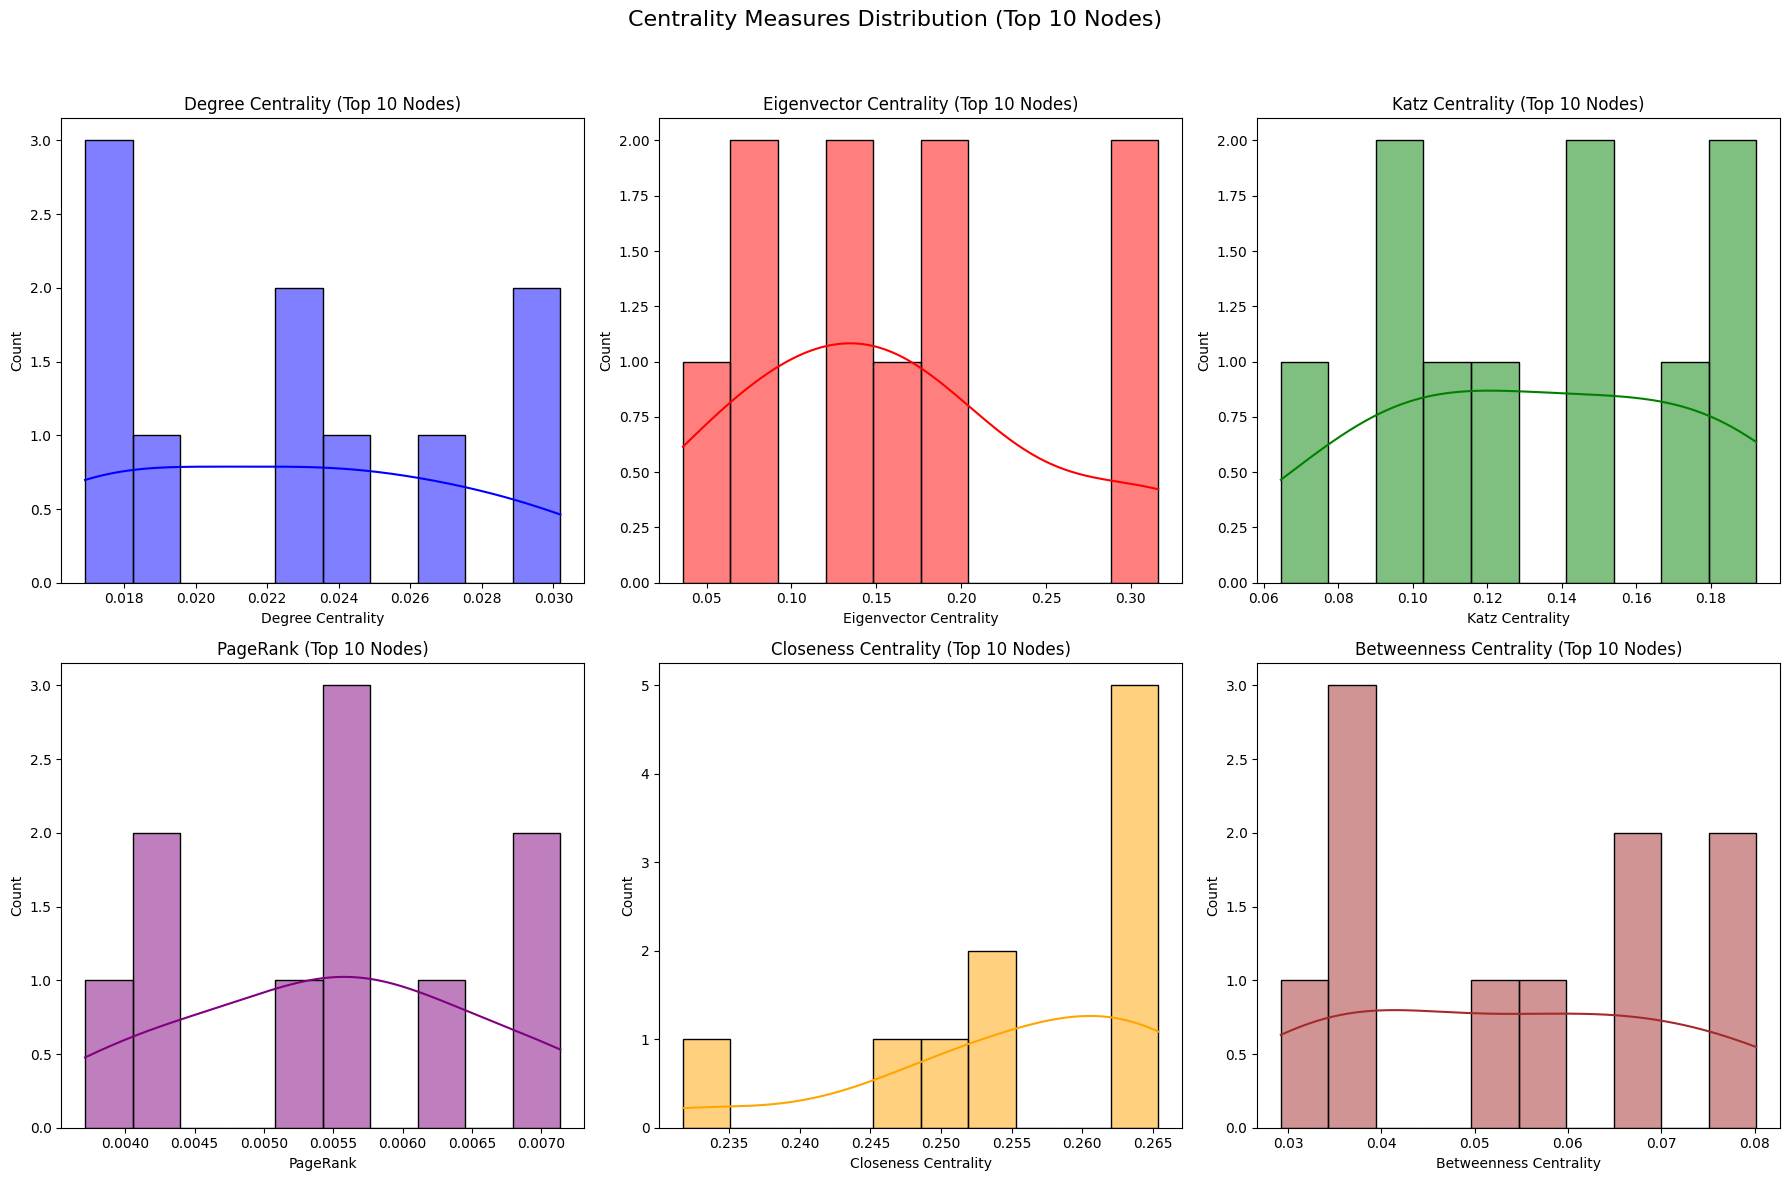

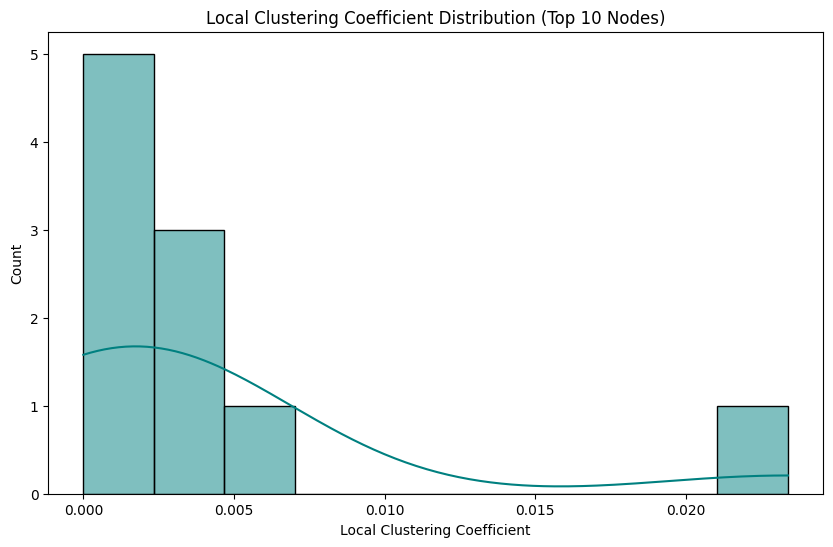

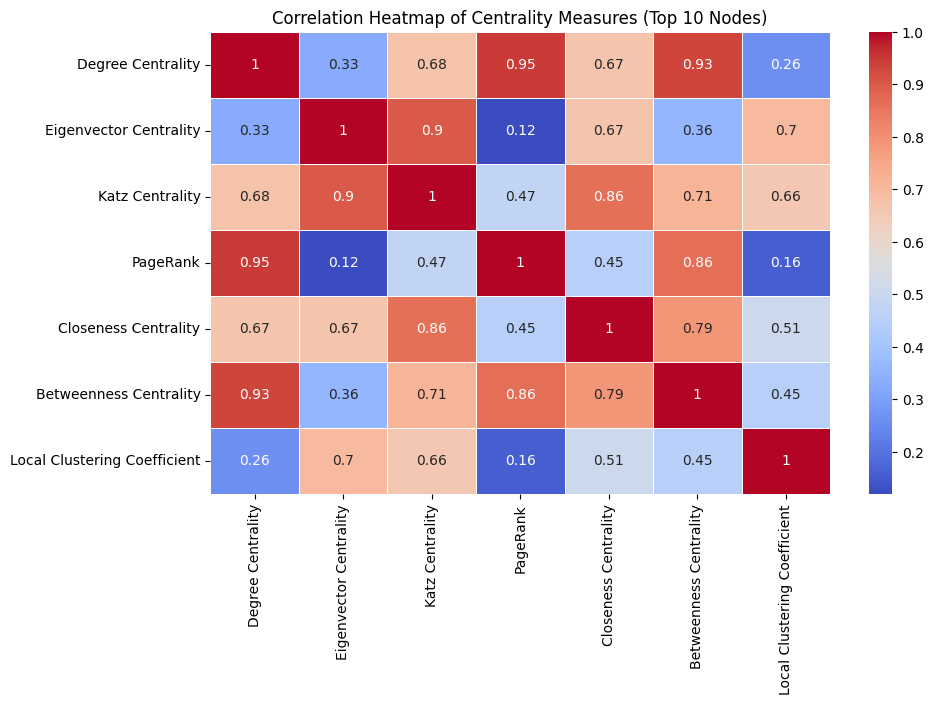

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Select the top 10 nodes based on Degree Centrality (or change to another metric)
top_10_nodes = df.nlargest(10, "Degree Centrality")  # Change metric if needed

### 🎨 Histogram Visualization of Centrality Measures (Top 10 Nodes) ###
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Centrality Measures Distribution (Top 10 Nodes)", fontsize=16)

# 1️⃣ Degree Centrality - Histogram
sns.histplot(top_10_nodes["Degree Centrality"], bins=10, kde=True, color="blue", ax=axes[0, 0])
axes[0, 0].set_title("Degree Centrality (Top 10 Nodes)")

# 2️⃣ Eigenvector Centrality - Histogram
sns.histplot(top_10_nodes["Eigenvector Centrality"], bins=10, kde=True, color="red", ax=axes[0, 1])
axes[0, 1].set_title("Eigenvector Centrality (Top 10 Nodes)")

# 3️⃣ Katz Centrality - Histogram
sns.histplot(top_10_nodes["Katz Centrality"], bins=10, kde=True, color="green", ax=axes[0, 2])
axes[0, 2].set_title("Katz Centrality (Top 10 Nodes)")

# 4️⃣ PageRank - Histogram
sns.histplot(top_10_nodes["PageRank"], bins=10, kde=True, color="purple", ax=axes[1, 0])
axes[1, 0].set_title("PageRank (Top 10 Nodes)")

# 5️⃣ Closeness Centrality - Histogram
sns.histplot(top_10_nodes["Closeness Centrality"], bins=10, kde=True, color="orange", ax=axes[1, 1])
axes[1, 1].set_title("Closeness Centrality (Top 10 Nodes)")

# 6️⃣ Betweenness Centrality - Histogram
sns.histplot(top_10_nodes["Betweenness Centrality"], bins=10, kde=True, color="brown", ax=axes[1, 2])
axes[1, 2].set_title("Betweenness Centrality (Top 10 Nodes)")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 🔥 Histogram of Local Clustering Coefficient (Top 10 Nodes) ###
plt.figure(figsize=(10, 6))
sns.histplot(top_10_nodes['Local Clustering Coefficient'], bins=10, kde=True, color="teal")
plt.title("Local Clustering Coefficient Distribution (Top 10 Nodes)")
plt.show()

### 🔥 Heatmap of Centrality Measures (Top 10 Nodes) ###
plt.figure(figsize=(10, 6))
sns.heatmap(top_10_nodes.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Centrality Measures (Top 10 Nodes)")
plt.show()


In [19]:
import json

# Save function
def save_to_json(data, filename):
    with open(filename, "w") as f:
        json.dump(data, f, indent=4)

# Convert and Save Centrality Measures
save_to_json(degree_centrality, "degree_centrality.json")
save_to_json(eigenvector_centrality, "eigenvector_centrality.json")
save_to_json(katz_centrality, "katz_centrality.json")
save_to_json(pagerank, "pagerank.json")
save_to_json(closeness_centrality, "closeness_centrality.json")
save_to_json(betweenness_centrality, "betweenness_centrality.json")
save_to_json(local_clustering, "local_clustering.json")

# Save Global & Average Clustering as JSON
clustering_summary = {
    "Global Clustering Coefficient": global_clustering,
    "Average Local Clustering Coefficient": avg_local_clustering
}
save_to_json(clustering_summary, "clustering_summary.json")

In [7]:

# Print top 10 nodes for each centrality measure
def print_top_10(centrality_dict, measure_name):
    sorted_nodes = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f"\nTop 10 Nodes by {measure_name}:")
    for node, value in sorted_nodes:
        print(f"Node {node}: {value:.4f}")

# Print top 10 nodes for each centrality measure
print_top_10(degree_centrality, "Degree Centrality")
print_top_10(eigenvector_centrality, "Eigenvector Centrality")
print_top_10(katz_centrality, "Katz Centrality")
print_top_10(pagerank_centrality, "PageRank Centrality")
print_top_10(betweenness_centrality, "Betweenness Centrality")
print_top_10(closeness_centrality, "Closeness Centrality")

NameError: name 'degree_centrality' is not defined